In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv('C:/Users/Alex/Desktop/С/GeekBrains/7_DataSience/Project/train.csv')

In [4]:
data=df.copy()

In [5]:
data.shape

(10000, 20)

In [6]:
data=data.drop('Healthcare_1',axis=1)

In [7]:
data.loc[data['HouseYear']>2019].shape

(21, 19)

In [8]:
data.loc[data['HouseYear']==20052011,'HouseYear']=2008

In [9]:
data.loc[data['HouseYear']==4968,'HouseYear']=1968



Меняю 2020 год постройки на 2019



In [10]:
data.loc[data['HouseYear']==2020,'HouseYear']=2019

In [11]:
data.loc[data['HouseYear']>2019]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


In [12]:
data.loc[data['Rooms']==19,'Rooms']=1

In [13]:
data.loc[data['Rooms']==10,'Rooms']=2

In [14]:
def fillna_lifesquare(df,df_source):
    df['LifeSquare']=df['LifeSquare'].fillna(df_source['LifeSquare'].mean())
    #df['LifeSquare']=df['LifeSquare'].fillna(df_source['LifeSquare'].median())
    return df

In [15]:
data=fillna_lifesquare(data,data)

In [16]:
data.loc[[377,8849],:]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,2.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.323792
8849,14865,9,2.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,2,4,B,172329.270863


In [17]:
index_array_square=data.loc[data['Square']<24].index
index_array_square

Int64Index([ 212, 1316, 1476, 1608, 1891, 3084, 3166, 3280, 3413, 3794, 4118,
            4364, 4739, 4853, 4900, 5617, 6054, 6392, 6945, 6993, 7694, 7767,
            7897, 8030, 8283, 8598, 9033, 9294, 9516, 9613, 9642],
           dtype='int64')

In [18]:
data=data.drop(index_array_square,axis=0).reset_index(drop=True)

In [19]:
data.loc[data['LifeSquare']>637]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
4317,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,0,0,B,217357.492366
6958,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,3,23,B,133529.681562


In [20]:
data.loc[data['LifeSquare']>7480,'LifeSquare']=data.loc[data['LifeSquare']>7480,'LifeSquare']/100

In [21]:
data=data.drop(6958)

In [22]:
data=data.drop(4317)

In [23]:
data['LifeSquare']=data['LifeSquare'].fillna(data['LifeSquare'].mean())

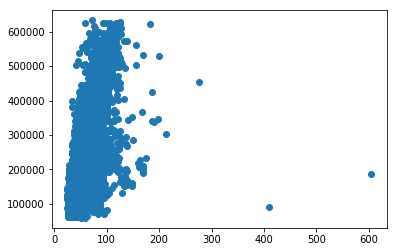

In [24]:
plt.scatter(data['Square'],data['Price']);

In [25]:
index_square=data.loc[data['Square']>250].index

In [26]:
data.drop(index_square, axis=0,inplace=True)

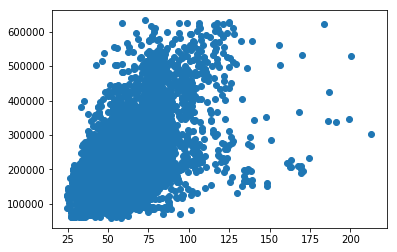

In [27]:
plt.scatter(data['Square'],data['Price']);

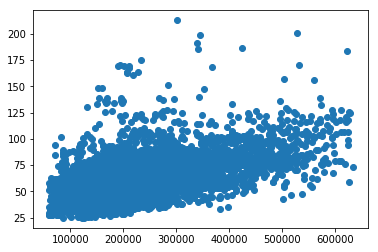

In [28]:
plt.scatter(data['Price'],data['Square']);

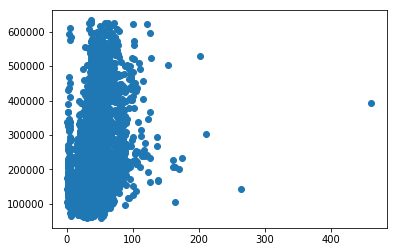

In [29]:
plt.scatter(data['LifeSquare'],data['Price']);

In [30]:
index_lifesquare=data.loc[data['LifeSquare']>180].index

In [31]:
data.drop(index_lifesquare, axis=0,inplace=True)

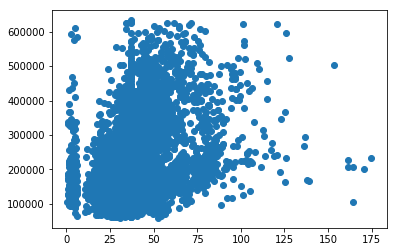

In [32]:
plt.scatter(data['LifeSquare'],data['Price']);

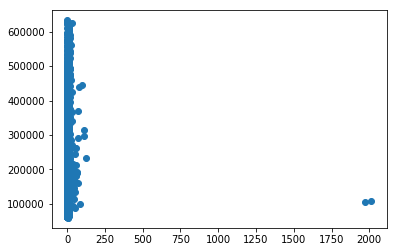

In [33]:
plt.scatter(data['KitchenSquare'],data['Price']);

In [34]:
index_kitchenSquare=data.loc[data['KitchenSquare']>70].index

In [35]:
data.drop(index_kitchenSquare, axis=0,inplace=True)

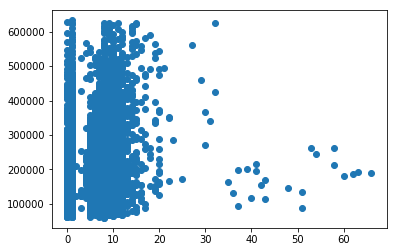

In [36]:
plt.scatter(data['KitchenSquare'],data['Price']);

plt.scatter(data['Floor'],data['Price']);

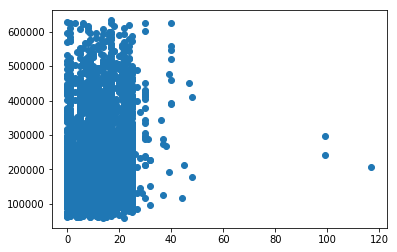

In [37]:
plt.scatter(data['HouseFloor'],data['Price']);

In [38]:
index_kitchenSquare=data.loc[data['HouseFloor']>60].index

In [39]:
data.drop(index_kitchenSquare, axis=0,inplace=True)

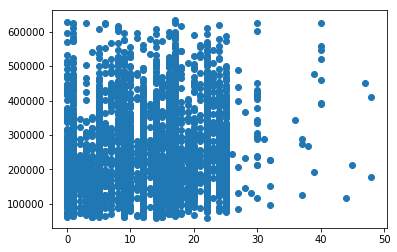

In [40]:
plt.scatter(data['HouseFloor'],data['Price']);

In [41]:
shape_0_rooms=data.loc[data['Rooms']==0,'Price'].index

In [42]:
data.drop(shape_0_rooms, axis=0,inplace=True)

In [43]:
def prepare_square(df):
    df.loc[df['Square']>(df['Rooms']*40+20),'Square']=df['Rooms']*40+20
    df.loc[df['Square']<(df['Rooms']*15),'Square']=df['Rooms']*15
    return df

In [44]:
data=prepare_square(data)

In [45]:
shape_0_kitchenSquare=data.loc[data['KitchenSquare']==0,'Price'].index

In [46]:
data.drop(shape_0_kitchenSquare, axis=0,inplace=True)

In [47]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,9255.000000,9255.000000,9255.000000,9255.000000,9255.000000,9255.000000,9255.000000,9255.000000,9255.000000,9255.000000,9255.000000,9255.000000,9255.000000,9255.000000,9255.000000,9255.000000
mean,8395.784981,51.888277,1.895840,55.685661,35.792727,6.239978,8.461696,12.786062,1985.045921,0.118914,25.828309,5585.038033,8.362939,1.380551,4.403674,216587.098146
std,4869.490391,44.293301,0.813065,18.025470,15.203653,4.308029,5.188308,6.306936,18.695342,0.119069,17.316596,3985.626807,24.275991,1.496040,4.839345,92847.656377
min,0.000000,0.000000,1.000000,24.711701,0.795539,1.000000,1.000000,0.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4166.500000,21.000000,1.000000,41.698336,24.415838,1.000000,4.000000,9.000000,1973.000000,0.017647,9.000000,1986.000000,0.000000,0.000000,1.000000,156533.604795
50%,8409.000000,39.000000,2.000000,52.230780,35.913373,6.000000,7.000000,14.000000,1977.000000,0.075779,25.000000,5487.000000,2.000000,1.000000,3.000000,194551.921188
75%,12625.500000,79.000000,2.000000,65.372618,41.646288,9.000000,12.000000,17.000000,2002.000000,0.194489,36.000000,7614.000000,5.000000,3.000000,6.000000,252205.488582
max,16798.000000,209.000000,6.000000,198.930182,174.837082,66.000000,42.000000,48.000000,2019.000000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570


In [48]:
def join_stats1(df,stats1,source_df,mode='train'):
    df=pd.merge(df,stats1,on=['DistrictId','Rooms'],how='left')
    if mode=='test':
        df['mean_price']=df['mean_price'].fillna(source_df['mean_price'].mean())
    return df

In [49]:
stats1=data.groupby(['DistrictId','Rooms'],as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price'})

In [50]:
data=join_stats1(data,stats1,data)

In [51]:
from sklearn.model_selection import train_test_split 

In [52]:
features=data[['Rooms','Square','LifeSquare','mean_price']]
target=data['Price']

In [53]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.3)

In [54]:
from sklearn.ensemble import RandomForestRegressor as RF

In [55]:
model=RF(n_estimators=100,max_depth=10,min_samples_leaf=5)

In [56]:
%%time
model.fit(X_train,y_train)

Wall time: 750 ms


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [57]:
y_pred_3=model.predict(X_test)

In [58]:
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [59]:
print(mse(y_test,y_pred_3),r2(y_test,y_pred_3))

2377806600.8150525 0.7294702660486081


In [60]:
print(model.feature_importances_)

[0.02850601 0.14368518 0.03810454 0.78970428]


In [61]:
test=pd.read_csv('C:/Users/Alex/Desktop/С/GeekBrains/7_DataSience/Project/test.csv')

In [63]:
test=prepare_square(test)

In [64]:
test=fillna_lifesquare(test,data)

In [65]:
test=join_stats1(test,stats1,data,mode='test')

In [67]:
test1=test[['Rooms','Square','LifeSquare','mean_price']]

In [69]:
test['Price']=model.predict(test1)

In [70]:
test[['Id','Price']].to_csv('C:/Users/Alex/Desktop/С/GeekBrains/7_DataSience/Project/AMGaydukov_predictions.csv',index= None)